# Mobile Price Classification

#### importing libraries

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams.update({'font.size': 25})

##### creating dataframe

In [46]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [47]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [48]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [49]:
print(train.shape)
print(test.shape)

(2000, 21)
(1000, 21)


In [50]:
print(test.columns.sort_values())
print(train.columns.sort_values())

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'id', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'price_range',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


train has extra column price range. <br>
test has extra column id.

In [51]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [53]:
categorical = [var for var in train.columns if train[var].dtype == 'O']
categorical

[]

In [54]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Data Visualization

### Ram vs Price Range

In [55]:
train['ram_group'] = pd.cut(train['ram'], bins = 5, labels = ["1", "2", "3", "4", "5"])
print(len(train["ram_group"].unique()))

5


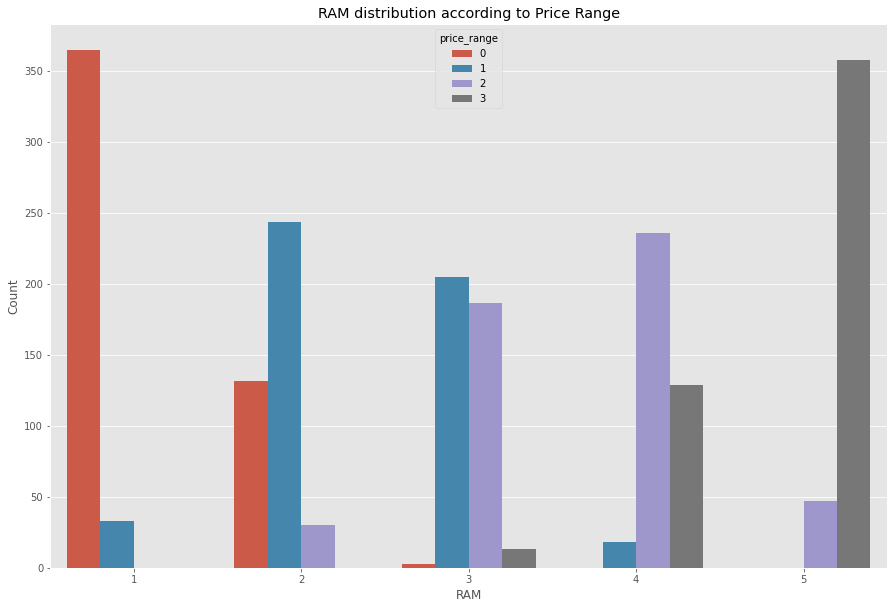

In [56]:
plt.style.use('ggplot')
fig , ax = plt.subplots(figsize = (15,10))
ax = sns.countplot(x = "ram_group", hue = "price_range", data = train)
plt.xlabel('RAM')
plt.ylabel('Count')
plt.title("RAM distribution according to Price Range")
train.drop(columns = "ram_group", inplace = True, axis = 1)

#### Plotting mean ram of each price range.

In [57]:
mean_ram = train.groupby("price_range")["ram"].mean()
mean_ram.tolist()

[785.314, 1679.49, 2582.816, 3449.232]

[]

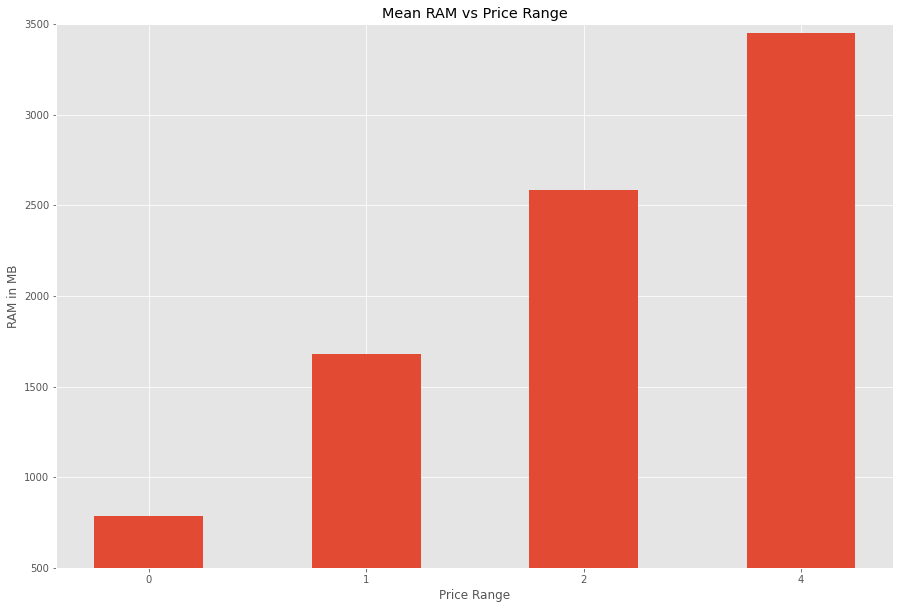

In [58]:
x = mean_ram
y = ['0', '1', '2', '4']

plt.figure(figsize = (15, 10))
plt.bar(y, x, width = 0.5)
plt.xlabel("Price Range")
plt.ylabel("RAM in MB")
plt.title("Mean RAM vs Price Range")
plt.ylim([500, 3500])
plt.plot()

### Battery VS Price Range

In [59]:
mean_power = train.groupby("price_range")["battery_power"].mean()
mean_power.tolist()

[1116.902, 1228.868, 1228.32, 1379.984]

[]

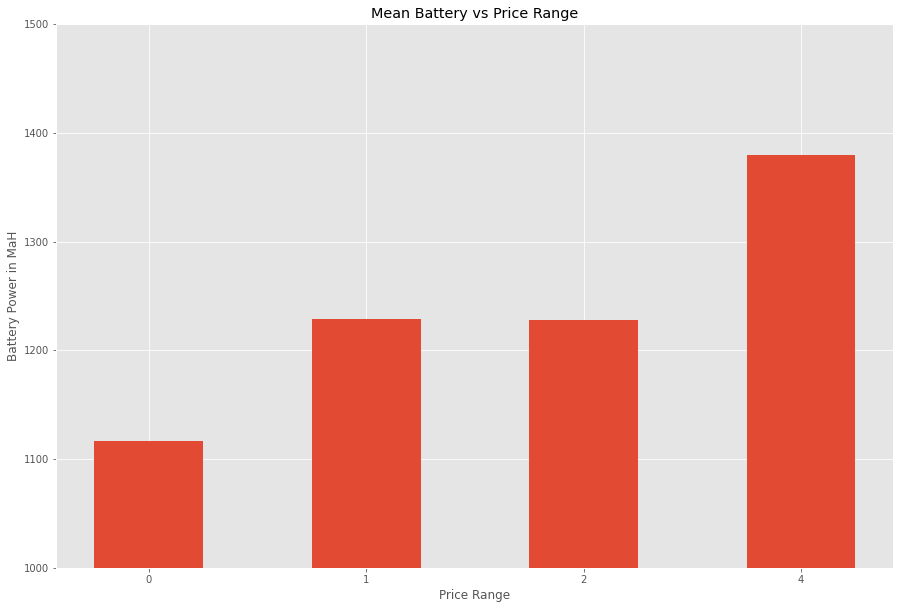

In [60]:
x = mean_power
y = ['0', '1', '2', '4']

plt.figure(figsize = (15, 10))
plt.bar(y, x, width = 0.5)
plt.xlabel("Price Range")
plt.ylabel("Battery Power in MaH")
plt.title("Mean Battery vs Price Range")
plt.ylim([1000, 1500])
plt.plot()

###  Screen Resolution vs Price Range

In [61]:
# Number of pixels = px_height * px_width
train["px_count"] = train["px_height"] * train["px_width"]

In [62]:
mean_res = train.groupby("price_range")["px_count"].mean()
mean_res.tolist()

[678837.798, 930234.068, 880749.466, 1131218.882]

[]

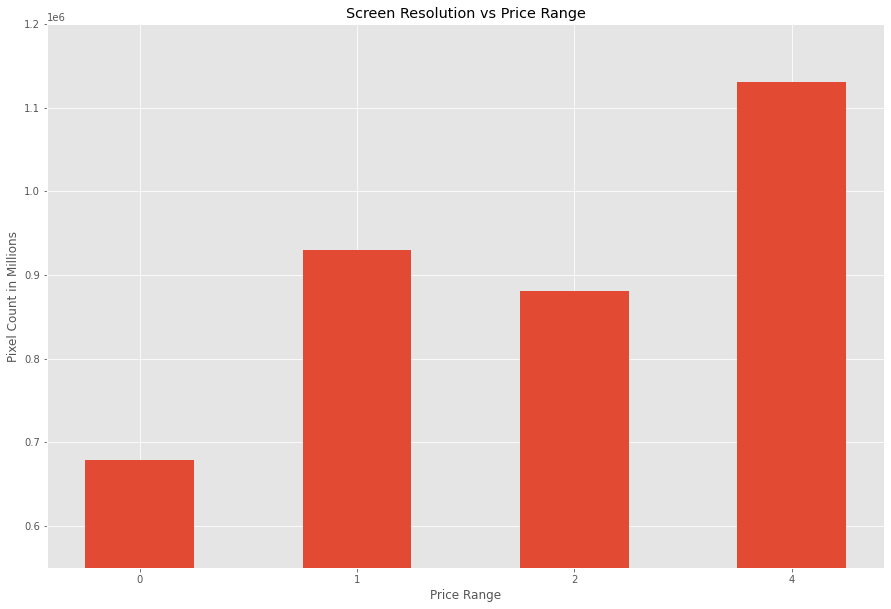

In [63]:
x = mean_res
y = ['0', '1', '2', '4']

plt.figure(figsize = (15, 10))
plt.bar(y, x, width = 0.5)
plt.xlabel("Price Range")
plt.ylabel("Pixel Count in Millions")
plt.title("Screen Resolution vs Price Range")
plt.ylim([550000, 1200000])
plt.plot()

## Battery VS Screen Resolution

I think that when we increase the screen resolution, the batter capacity should also increase to compensate for the increased power draw. <br>
Let's test this hypothesis.

In [64]:
train[["px_height", "px_width", "px_count", "battery_power"]].describe()

,px_height,px_width,px_count,battery_power
count,2000.000000,2000.000000,2.000000e+03,2000.000000
mean,645.108000,1251.515500,9.052601e+05,1238.518500
std,443.780811,432.199447,8.297625e+05,439.418206
min,0.000000,500.000000,0.000000e+00,501.000000
25%,282.750000,874.750000,2.632005e+05,851.750000
50%,564.000000,1247.000000,6.013590e+05,1226.000000
75%,947.250000,1633.000000,1.359027e+06,1615.250000
max,1960.000000,1998.000000,3.886306e+06,1998.000000


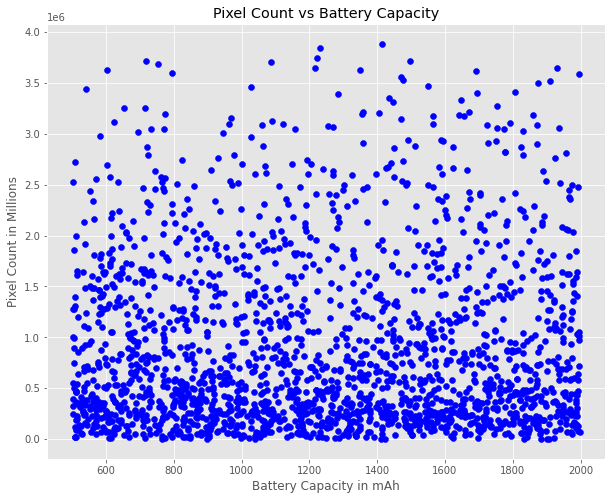

In [65]:
plt.figure(figsize = (10, 8))
plt.scatter(train["battery_power"], train["px_count"], color = "blue")
plt.title("Pixel Count vs Battery Capacity")
plt.ylabel("Pixel Count in Millions")
plt.xlabel("Battery Capacity in mAh")
plt.show()
# scatter plot below doesn't contain any information.
# let's remove the outliers and plot it again.

Text(0.5, 1.0, 'Battery Capacity Box Plot')

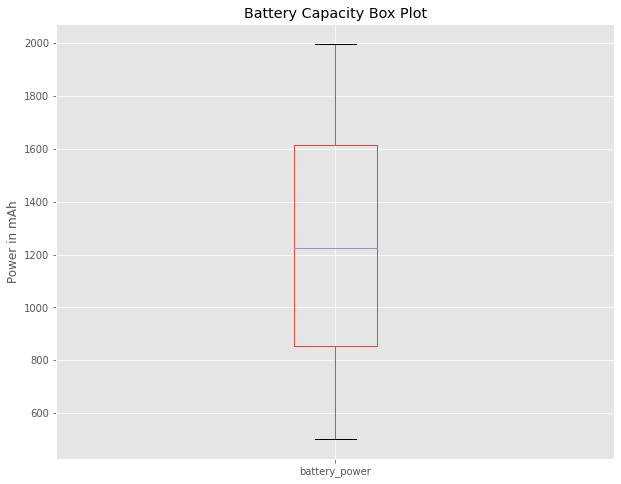

In [66]:
plt.figure(figsize = (10, 8))
fig = train.boxplot(column = "battery_power")
fig.set_ylabel("Power in mAh")
fig.set_title("Battery Capacity Box Plot")

Text(0.5, 1.0, 'Resolution Box Plot')

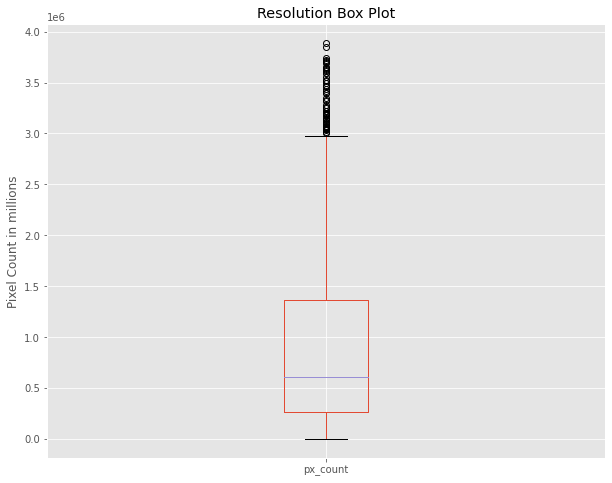

In [67]:
plt.figure(figsize = (10, 8))
fig = train.boxplot(column = "px_count")
fig.set_ylabel("Pixel Count in millions")
fig.set_title("Resolution Box Plot")

In [68]:
per_25 = train["px_count"].quantile(0.25)
per_75 = train["px_count"].quantile(0.75)
iqr = per_75 - per_25
lower_fence = per_25
upper_fence = per_75
print("lower boundary {lower} and upper boundary {upper}\nIQR = {iqr}".format(lower = lower_fence, upper = upper_fence, iqr = iqr))

lower boundary 263200.5 and upper boundary 1359027.25
IQR = 1095826.75


In [69]:
pixels = []
battery_cap = []
for i in range (len(train)):
    if (train.iloc[i]["px_count"] > lower_fence and train.iloc[i]["px_count"] < upper_fence):
        pixels.append(train.iloc[i]["px_count"])
        battery_cap.append(train.iloc[i]["battery_power"])
    
pixels_vs_battery = pd.DataFrame()
pixels_vs_battery["px_count"] = pixels
pixels_vs_battery["battery_power"] = battery_cap
pixels_vs_battery

,px_count,battery_power
0,387858.0,1821.0
1,588288.0,1954.0
2,322696.0,1445.0
3,454036.0,1815.0
4,495360.0,803.0
...,...,...
995,1059518.0,1617.0
996,1041984.0,674.0
997,975912.0,1467.0
998,747648.0,858.0


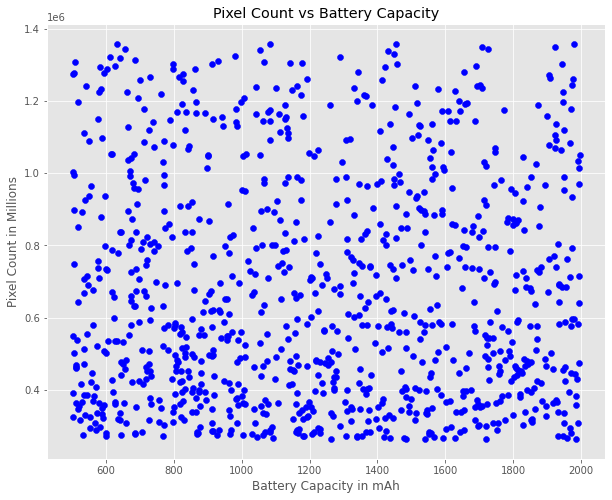

In [70]:
plt.figure(figsize = (10, 8))
plt.scatter(pixels_vs_battery["battery_power"], pixels_vs_battery["px_count"], color = "blue")
plt.title("Pixel Count vs Battery Capacity")
plt.ylabel("Pixel Count in Millions")
plt.xlabel("Battery Capacity in mAh")
plt.show()

# No trend line.

In [115]:
pixels_vs_battery['battery_power_category'] = pd.cut(pixels_vs_battery['battery_power'], bins = 10, labels = [var for var in range (10)])
pixels_vs_battery['px_category'] = pd.cut(pixels_vs_battery['px_count'], bins = 10, labels = [var for var in range (10)])

In [116]:
# calculating median per battery_power_category
median_res = pixels_vs_battery.groupby("battery_power_category")["px_count"].median()
median_battery = pixels_vs_battery.groupby("px_category")["battery_power"].median()

[]

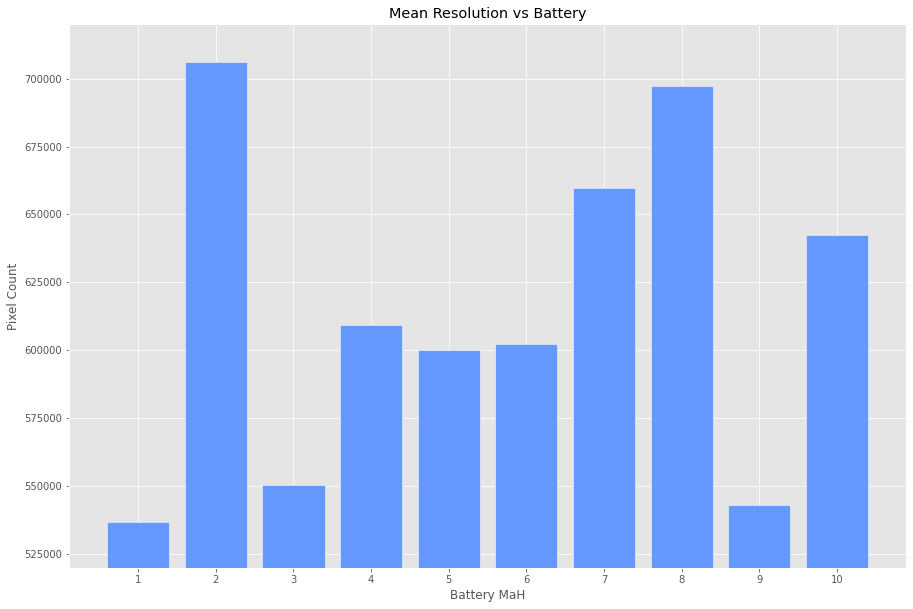

In [124]:
x = median_res


y = [str(var) for var in range(1, 11)]

plt.figure(figsize = (15, 10))

plt.bar(y, x, 0.8, color='#6699ff', edgecolor = "white")
plt.xlabel("Battery MaH")
plt.ylabel("Pixel Count")
plt.title("Mean Resolution vs Battery")
plt.ylim([520000, 720000])

# x = median_battery

# plt.subplot(1, 2, 2)
# plt.bar(y, x)
# plt.ylabel("Battery MaH")
# plt.xlabel("Pixel Count")
# plt.title("Mean Battery vs Resolution")
# plt.ylim([1050, 1500])

plt.plot()

# train.drop(columns = ["px_count", "battery_power_category"], inplace = True, axis = 1)

##### No realation between Battery MaH and Pixel Count in dataset.

### Front Camera Vs Primary Camera

<AxesSubplot:title={'center':'Front Camera vs Primary Camera'}, xlabel='Primary Camera in megapixels', ylabel='Front Camera in megapixels'>

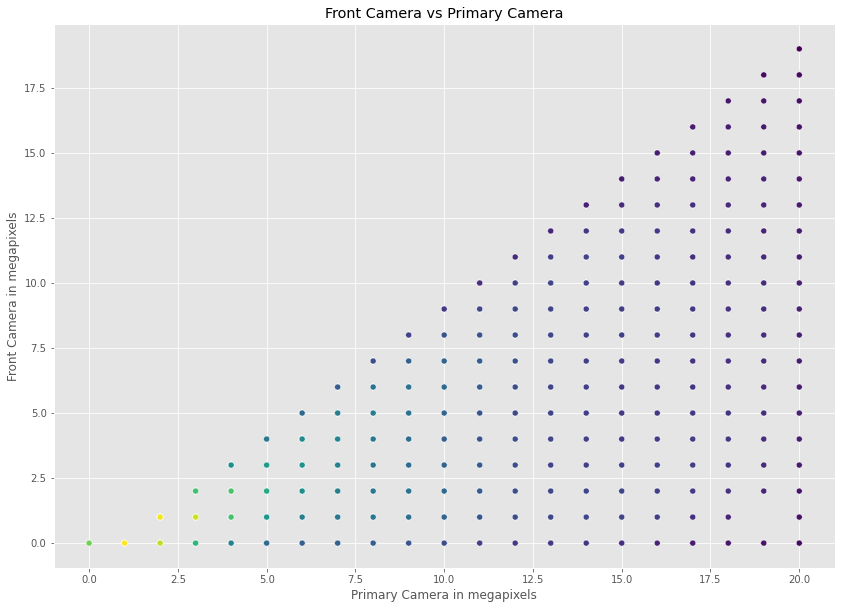

In [74]:
from scipy import stats

plt.figure(figsize = (14, 10))

values = np.vstack([train["pc"], train["fc"]])
kernel = stats.gaussian_kde(values)(values)

plt.xlabel("Primary Camera in megapixels")
plt.ylabel("Front Camera in megapixels")
plt.title("Front Camera vs Primary Camera")
sns.scatterplot(x = "pc", y = "fc", data = train,  c=kernel, cmap="viridis")

## HeatMap

In [75]:
correlation = train.corr()

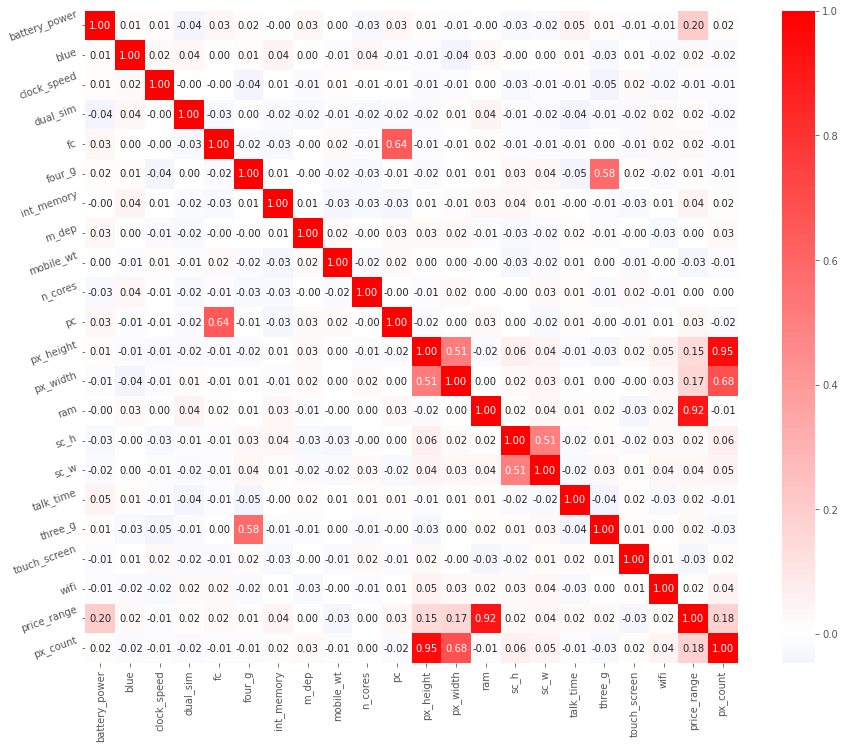

In [76]:
plt.figure(figsize = (16, 12))

ax = sns.heatmap(correlation, square = True, annot = True, fmt = ".2f", cmap="bwr", linecolor='white', center = 0)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 20)
plt.show()

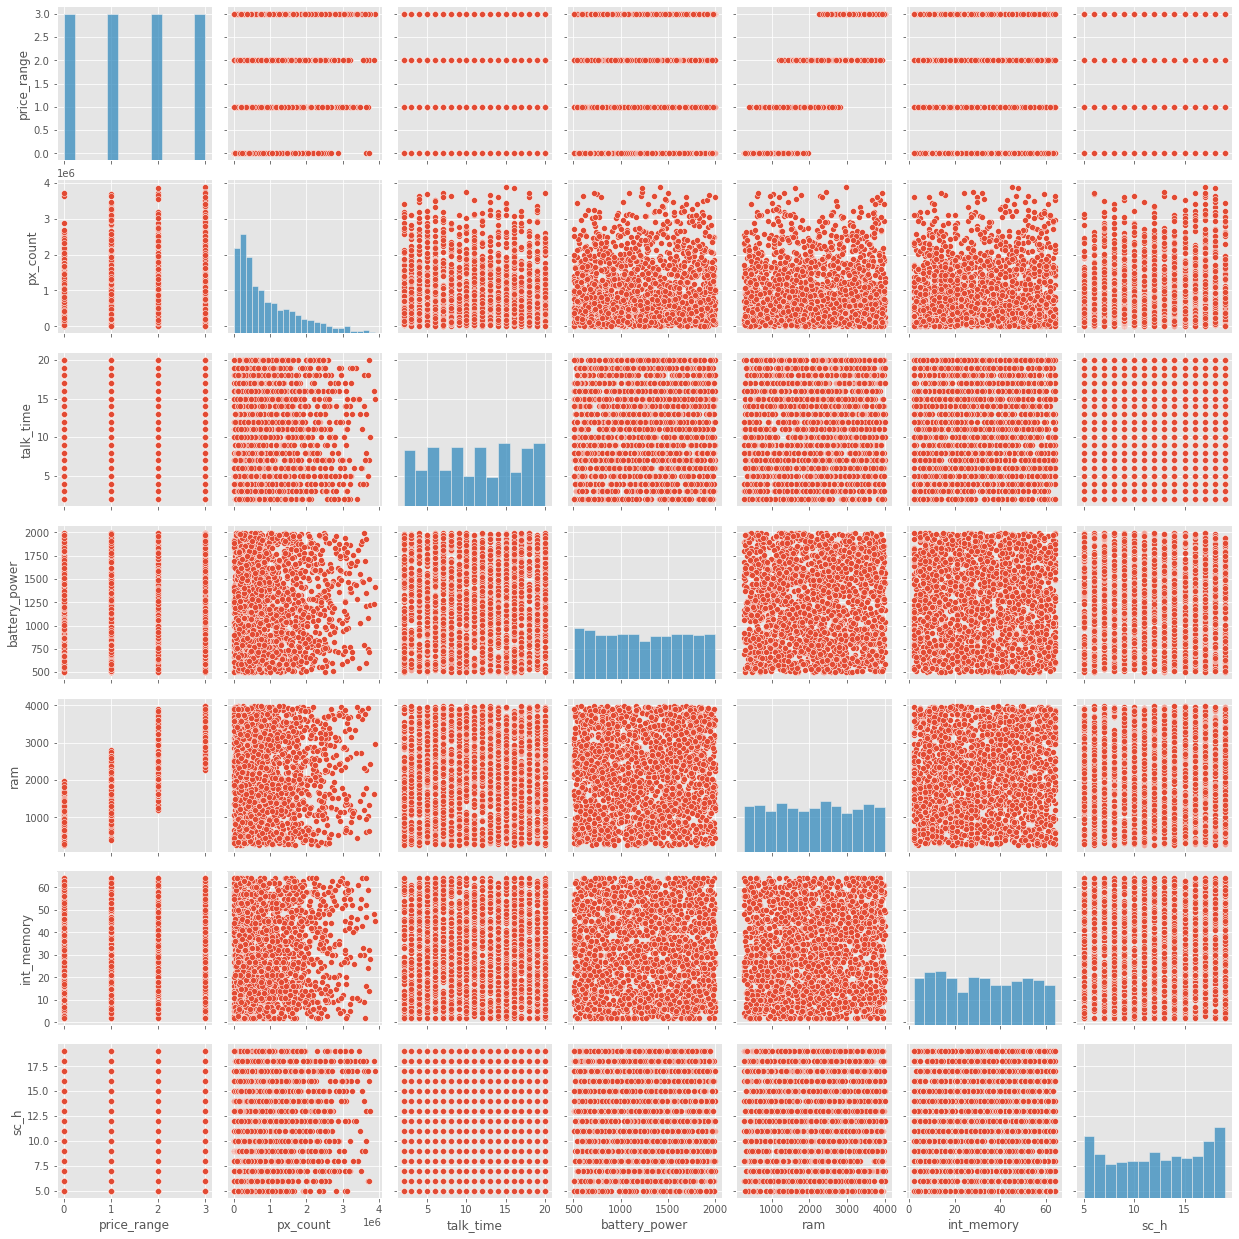

In [77]:
sns.pairplot(train[["price_range", "px_count", "talk_time", "battery_power", "ram", "int_memory", "sc_h"]], diag_kind = "hist", palette='Rainbow')
plt.show()

## Network Support

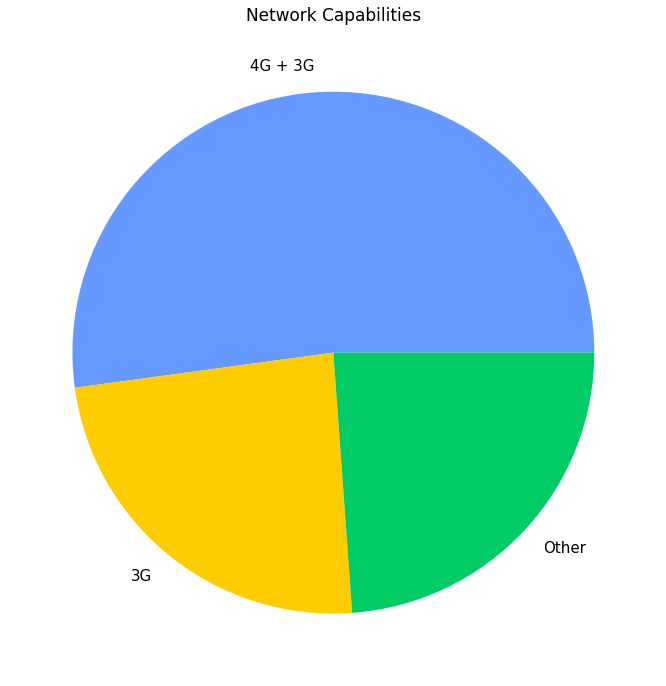

In [33]:
four_g = 0
three_g = 0
both = 0
for i in range(0, len(train)):
    if (train.iloc[i]['four_g'] and train.iloc[i]['three_g']):
        both += 1
        continue
    if (train.iloc[i]['four_g']):
        four_g += 1
    if (train.iloc[i]['three_g']):
        three_g += 1
    
other = 2000 - (both + three_g)

plt.figure(figsize = (16, 12))

y = np.array([both, three_g, other])
mylabels = ["4G + 3G", "3G", "Other"]
colors = ["#6699ff", "#ffcc00", "#00cc66"]

plt.pie(y, labels = mylabels, colors = colors, textprops={'fontsize': 15})
plt.title("Network Capabilities", fontsize=17)
plt.show()


### Camera Analysis

Text(0.5, 0, 'MegaPixels')

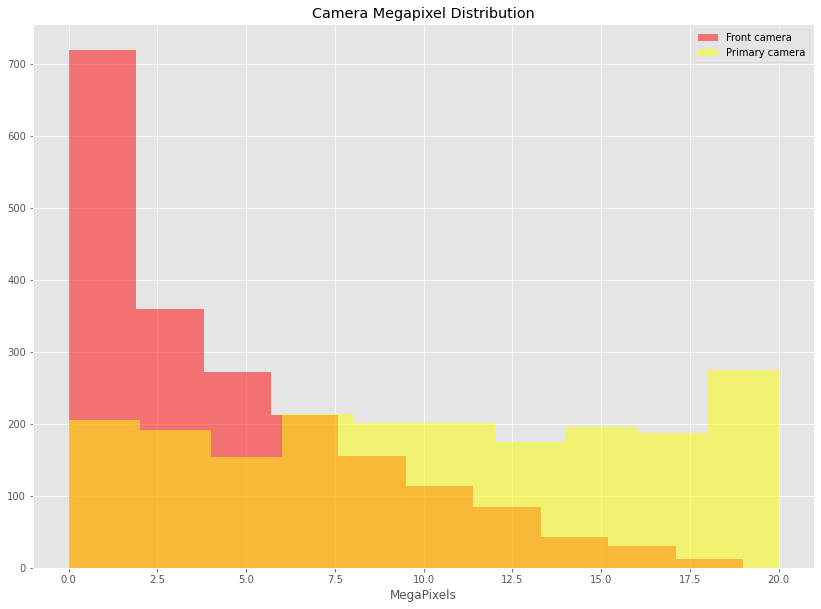

In [34]:
plt.figure(figsize=(14,10))
train['fc'].hist(alpha=0.5,color='red',label='Front camera')
train['pc'].hist(alpha=0.5,color='yellow',label='Primary camera')
plt.legend()
plt.title("Camera Megapixel Distribution")
plt.xlabel('MegaPixels')

## Talk Time vs Price Range

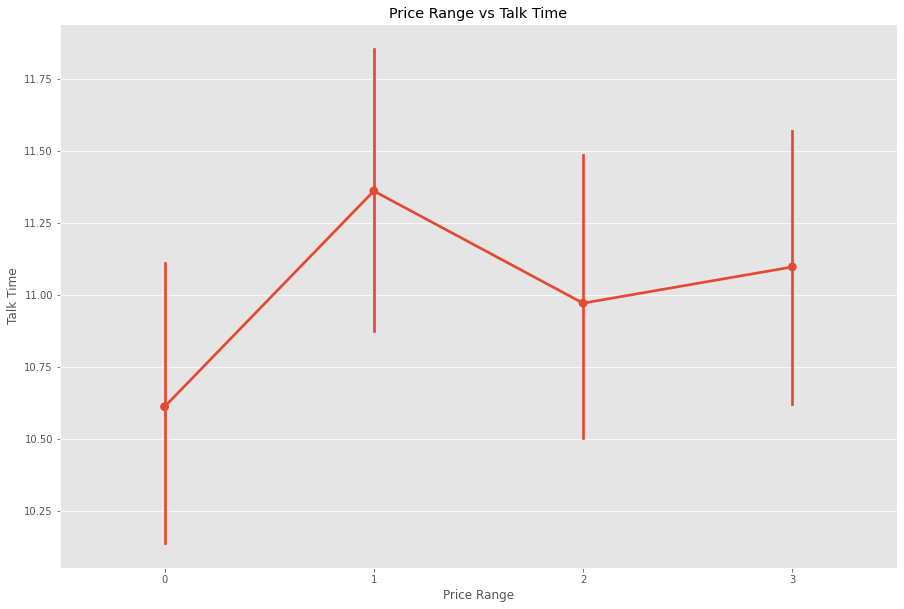

In [35]:
plt.figure(figsize=(15,10))
sns.pointplot(y="talk_time", x="price_range", data=train)
plt.ylabel("Talk Time")
plt.xlabel("Price Range")
plt.title("Price Range vs Talk Time")
plt.show()

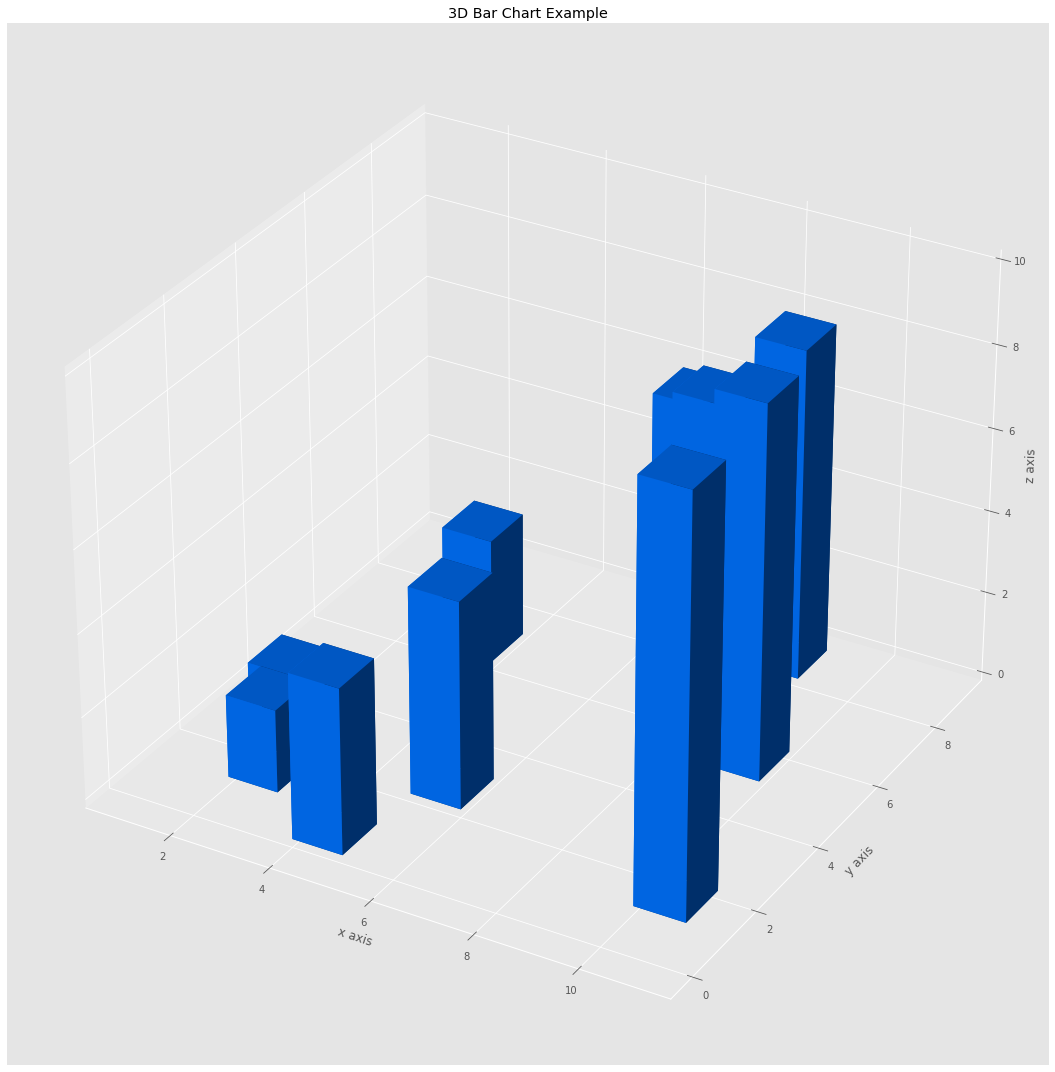

In [36]:
fig = plt.figure(figsize = (15, 15)) 
ax = fig.add_subplot(111, projection = '3d')

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
y = np.random.randint(10, size=10) 
z = np.zeros(10)

dx = np.ones(10) 
dy = np.ones(10) 
dz = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ax.bar3d(x, y, z, dx, dy, dz, color='#0072FF')

ax.set_xlabel('x axis') 
ax.set_ylabel('y axis') 
ax.set_zlabel('z axis') 
plt.title("3D Bar Chart Example") 
plt.tight_layout() 
plt.show()

# Creating a DBSCAN model

Let's first create a DBSCAN model without any optimizations.

In [37]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(train)

DBSCAN()

In [38]:
train['DBSCAN_labels']=dbscan.labels_ 
train['DBSCAN_labels'].value_counts()

-1    2000
Name: DBSCAN_labels, dtype: int64

In [39]:
train.drop(columns = 'DBSCAN_labels', axis = 1, inplace = True)

All points are in cluster -1. This means that every point is classified as a noise point.

In [40]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(train)
distances, indices = nbrs.kneighbors(train)

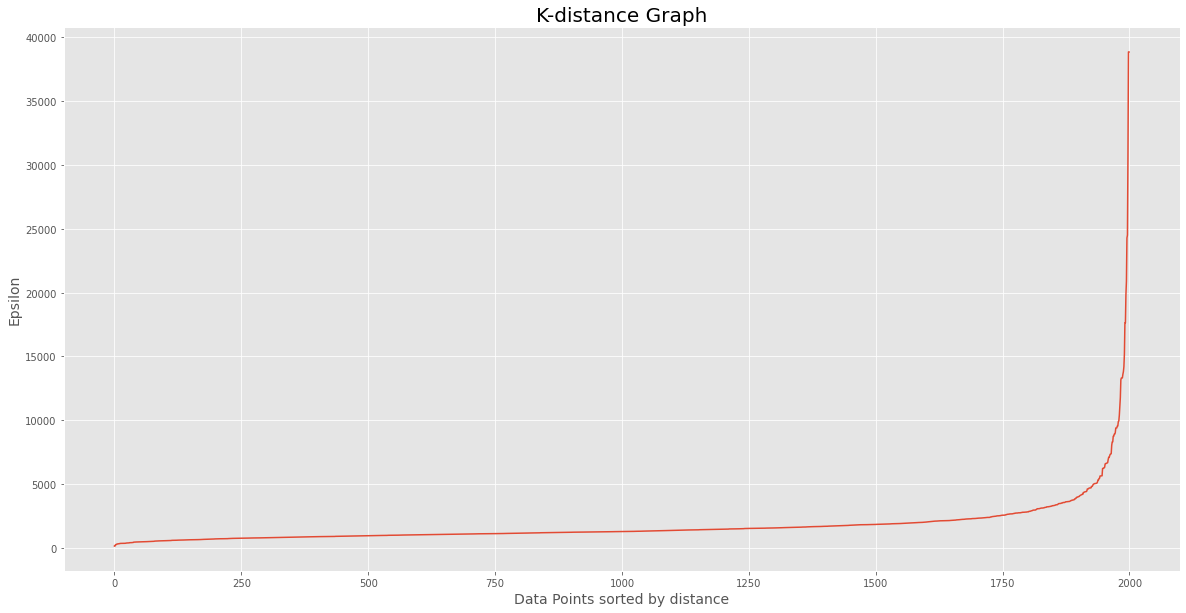

In [41]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

Max curvature is at eps = 5000 <br>
Min points should be more than columns. Let's keep it at 2 times the number of columns here.

In [42]:
dbscan=DBSCAN(eps = 35000, min_samples = 50)
dbscan.fit(train)

DBSCAN(eps=35000, min_samples=50)

In [43]:
train['DBSCAN_labels']=dbscan.labels_ 
train['DBSCAN_labels'].value_counts()

 0    1247
-1     700
 1      53
Name: DBSCAN_labels, dtype: int64

### DB